In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

Neighbors: 1, Accuracy: 0.750274
Neighbors: 3, Accuracy: 0.774787
Neighbors: 5, Accuracy: 0.782228
Neighbors: 7, Accuracy: 0.786168
Neighbors: 9, Accuracy: 0.787043
Neighbors: 11, Accuracy: 0.789888
Neighbors: 13, Accuracy: 0.796017
Neighbors: 15, Accuracy: 0.798862
Neighbors: 17, Accuracy: 0.803896
Neighbors: 19, Accuracy: 0.803677
Neighbors: 21, Accuracy: 0.806303
Neighbors: 23, Accuracy: 0.807398
Neighbors: 25, Accuracy: 0.807617
Neighbors: 27, Accuracy: 0.808054
Neighbors: 29, Accuracy: 0.808492
Neighbors: 31, Accuracy: 0.808492
Neighbors: 33, Accuracy: 0.808273
Neighbors: 35, Accuracy: 0.808492
Neighbors: 37, Accuracy: 0.808492
Neighbors: 39, Accuracy: 0.808492
Neighbors: 41, Accuracy: 0.808492
Neighbors: 43, Accuracy: 0.808492
Neighbors: 45, Accuracy: 0.808492
Neighbors: 47, Accuracy: 0.808492
Neighbors: 49, Accuracy: 0.808492


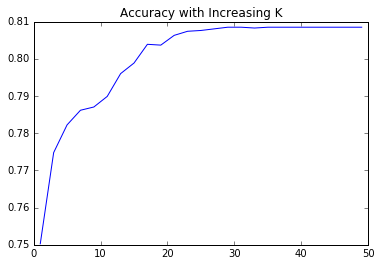

In [3]:
df = pd.read_csv("dataset/wine.csv")
 
test_idx = np.random.uniform(0, 1, len(df)) <= 0.3

train = df[test_idx==True]
test = df[test_idx==False]
 
features = ['density', 'sulphates', 'residual_sugar']
 
results = []
for n in range(1, 51, 2):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(train[features], train['high_quality'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['high_quality'], 1, 0).sum() / float(len(test))
    print("Neighbors: %d, Accuracy: %3f" % (n, accuracy))
 
    results.append([n, accuracy])
 
results = pd.DataFrame(results, columns=["n", "accuracy"])
 
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

In [4]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [5]:
len(df)

6497